# Exercise: Hyperparameter Tuning


`#scikit-learn` `#hyperparameter-tuning` `#svm` `#grid-search` `#random-search`


> **Objectives**:
>
> - Understand how hyperparameter tuning can improve model performance
> - Use Scikit-Learn to implement Grid Search and Randomized Search for tuning an SVM
> - Visualize the results of hyperparameter tuning


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [30]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start


- [x] Run this cell to record your start time:


In [31]:
deep_atlas.log_start_time()

🚀 Success! Get started...


---


## Context


Hyperparameter tuning is a crucial step in machine learning that can significantly impact model performance. Instead of relying on default settings, we adjust these **hyperparameters** to optimize the model.

In this exercise, we will:

1. Use **Grid Search** and **Randomized Search** to tune hyperparameters for a **Support Vector Machine (SVM)**.
2. Visualize the impact of tuning hyperparameters.
3. Evaluate the best-tuned model on the test set.


## Imports


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.stats import uniform

## Data


For the purposes of illustration, we will use the Olivetti Faces Dataset to classify faces based on image properties.

- [x] Load the dataset and split the data into training and test sets:


In [33]:
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces()
X = data.data
y = data.target

- [x] Split the data into train and test sets


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- [x] Standardize the features


In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Grid Search for SVM


Grid Search is an exhaustive search over a predefined set of hyperparameters. We will tune the SVM by adjusting `C`, `gamma`, and `kernel` parameters.

- [x] Set up and run Grid Search:


In [36]:
# Define the parameter grid
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.1, 0.01],
    "kernel": ["linear", "rbf"],  # We're tuning the kernel as well
}

# Instantiate the model
model = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters (Grid Search): {grid_search.best_params_}")
print(
    f"Best Cross-Validation Accuracy (Grid Search): {grid_search.best_score_:.3f}"
)

/Users/python/.local/share/virtualenvs/deep_atlas_course-JW55AXv8/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters (Grid Search): {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Accuracy (Grid Search): 0.947


## Visualizing Grid Search Results


To better understand how hyperparameters affect model performance, we will visualize the results of Grid Search using a heatmap. We will focus on `C` and `gamma` values for the **rbf** kernel.

- [x] Create the heatmap visualization:


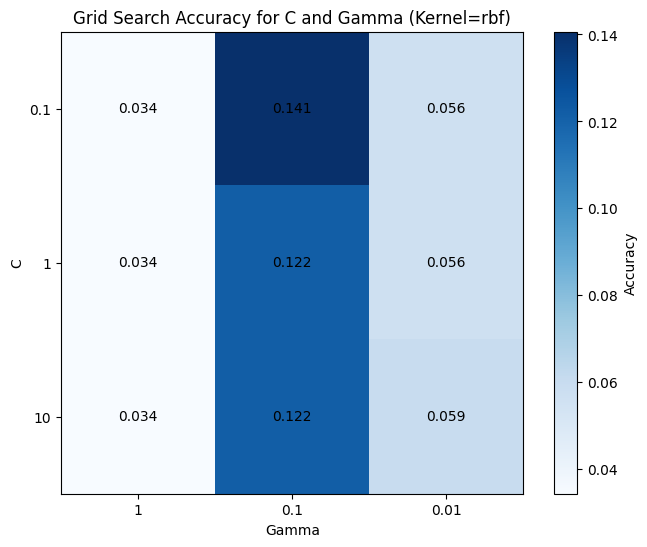

In [37]:
# Define a function to plot grid search results as a heatmap
def plot_grid_search(
    cv_results, param1, param2, param1_name, param2_name, kernel_name
):
    # Extract results for a specific kernel
    mask = np.array(
        [params["kernel"] == kernel_name for params in cv_results["params"]]
    )

    # Reshape to match the grid of C and gamma values
    scores_mean = cv_results["mean_test_score"][mask].reshape(
        len(param1), len(param2)
    )

    plt.figure(figsize=(8, 6))
    plt.imshow(scores_mean, interpolation="nearest", cmap="Blues")
    plt.title(
        f"Grid Search Accuracy for {param1_name} and {param2_name} (Kernel={kernel_name})"
    )
    plt.xlabel(param2_name)
    plt.ylabel(param1_name)
    plt.colorbar(label="Accuracy")

    # Add ticks and labels
    plt.xticks(np.arange(len(param2)), param2)
    plt.yticks(np.arange(len(param1)), param1)

    # Annotate each cell with the accuracy score
    for i in range(len(param1)):
        for j in range(len(param2)):
            plt.text(
                j,
                i,
                f"{scores_mean[i, j]:.3f}",
                ha="center",
                va="center",
                color="black",
            )

    plt.show()


# Visualize Grid Search results for 'C' and 'gamma' with 'rbf' kernel
plot_grid_search(
    grid_search.cv_results_,
    param_grid["C"],
    param_grid["gamma"],
    "C",
    "Gamma",
    kernel_name="rbf",
)

## Randomized Search for SVM


Randomized Search randomly samples hyperparameters from a specified distribution. It is more efficient than Grid Search, especially when dealing with large parameter spaces.

- [x] Set up and run Randomized Search:


In [38]:
# Define the parameter distributions
param_dist = {
    "C": uniform(0.1, 10),
    "gamma": uniform(0.01, 1),
    "kernel": ["linear", "rbf"],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_dist, n_iter=10, cv=5, scoring="accuracy", random_state=42
)
random_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Parameters (Random Search): {random_search.best_params_}")
print(
    f"Best Cross-Validation Accuracy (Random Search): {random_search.best_score_:.3f}"
)

/Users/python/.local/share/virtualenvs/deep_atlas_course-JW55AXv8/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters (Random Search): {'C': np.float64(3.845401188473625), 'gamma': np.float64(0.9607143064099162), 'kernel': 'linear'}
Best Cross-Validation Accuracy (Random Search): 0.947


## Visualizing Randomized Search Results


- [x] Plot how the random search accuracy changes over iterations:


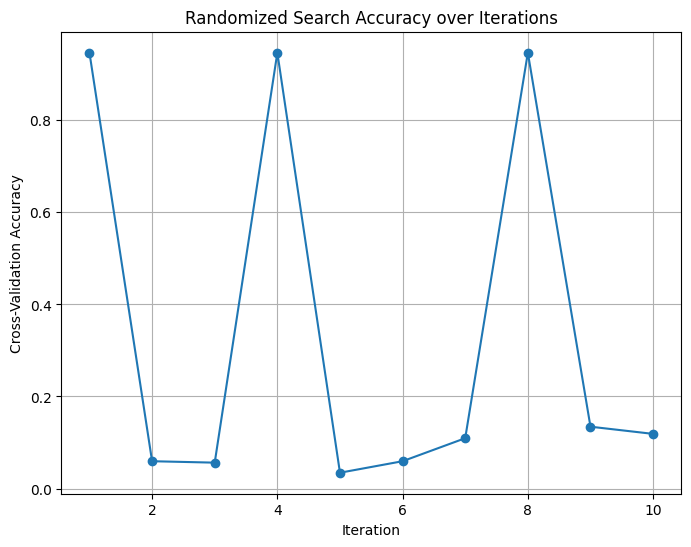

In [39]:
iterations = np.arange(1, random_search.n_iter + 1)
plt.figure(figsize=(8, 6))
plt.plot(
    iterations, random_search.cv_results_["mean_test_score"], marker="o"
)
plt.title("Randomized Search Accuracy over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cross-Validation Accuracy")
plt.grid(True)
plt.show()

## Final Evaluation


Once we have tuned our model, we will evaluate its performance on the test set.

- [x] Evaluate the best model found by Grid Search on the test set:


In [40]:
# Get the best model from Grid Search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_svm_model.score(X_test, y_test)
print(f"SVM Test Accuracy: {test_score:.3f}")

SVM Test Accuracy: 0.963


## 🚦 Checkpoint: Stop


- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time:


In [41]:
deep_atlas.log_feedback(
    {
        # How long were you actively focused on this section? (HH:MM)
        "active_time": "00:30",
        # Did you feel finished with this section (Yes/No):
        "finished": "yes",
        # How much did you enjoy this section? (1–5)
        "enjoyment": 4,
        # How useful was this section? (1–5)
        "usefulness": 4,
        # Did you skip any steps?
        "skipped_steps": "no",
        # Any obvious opportunities for improvement?
        "suggestions": [],
    }
)
deep_atlas.log_stop_time()

📝 Feedback logged!
🎉 Thanks! You're all done.


## You did it!


In this exercise, you learned how to tune hyperparameters using **Grid Search** and **Randomized Search** for an SVM. By visualizing the results, you gained a deeper understanding of how hyperparameters like `C`, `gamma`, and `kernel` affect model performance. You also evaluated the final tuned model on the test set.

Keep these concepts in mind as you tackle more advanced models and datasets in future exercises.
